# 6.5 MACHINE LEARNING CLUSTERING

### This script contains the following:
#### 1. IMPORTING DATA AND DATA LIBRARIES
#### 2. PROCESSING AND CLEANING THE DATA SET
#### 3. USING ELBOW TECHNIQUE
#### 4. K-MEANS CLUSTERING 
#### 5. FINAL DISCUSSION

### 1.IMPORTING DATA AND DATA LIBRARIES

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

In [11]:
%matplotlib inline

### DEFINING THE PATH 

In [12]:
path = r'C:\Users\gryzu\Supply Chain Management'

In [13]:
path

'C:\\Users\\gryzu\\Supply Chain Management'

### IMPORTING AND PROCESSING DATASET

In [14]:
path_to_pickle = os.path.join(path, '1 DATA', 'FORMATTED', 'ASIASCM_UPDATED.pkl')

In [15]:
asia = pd.read_pickle(path_to_pickle)

### 2.PROCESSING AND CLEANING THE DATA SET

In [16]:
# Checking the dataset 
asia.head()

,Type,Days for shipment (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late Delivery Risk,Category Id,Category Name,Department Id,...,Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Name,Product Price,Shipping Date,Shipping Mode,Price Category
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,2,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,2018-03-02 22:56:00,Standard Class,Middle price
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,2,...,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,Middle price
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,2,...,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,Middle price
3,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,2,...,95.180000,Eastern Asia,Guangdong,COMPLETE,73,Smart watch,327.75,2018-01-15 10:42:00,First Class,Middle price
4,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,2,...,68.430000,Eastern Asia,Guangdong,PROCESSING,73,Smart watch,327.75,2018-01-15 10:21:00,First Class,Middle price


The cleaning process of data has been done in the task 6.1 and additinally checked in 6.2-6.4 

In [17]:
# Checking all columns
asia.columns

Index(['Type', 'Days for shipment (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late Delivery Risk', 'Category Id', 'Category Name', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Date', 'Item Profit Ratio', 'Item Quantity', 'Sales',
       'Items Total', 'Profit Per Order', 'Order Region', 'Order State',
       'Order Status', 'Product Category Id', 'Product Name', 'Product Price',
       'Shipping Date', 'Shipping Mode', 'Price Category'],
      dtype='object')

In [21]:
asia.shape

(31112, 29)

#### DELETING UNNECESSARY COLUMNS

In [27]:
# Dropping categorical and qualitative columns
asia.drop('Days for shipment (real)', axis=1, inplace=True)
asia.drop('Days for shipment (scheduled)', axis=1, inplace=True)
asia.drop('Delivery Status', axis=1, inplace=True)
asia.drop('Late Delivery Risk', axis=1, inplace=True)
asia.drop('Category Id', axis=1, inplace=True)
asia.drop('Category Name', axis=1, inplace=True)
asia.drop('Department Id', axis=1, inplace=True)
asia.drop('Department Name', axis=1, inplace=True)
asia.drop('Market', axis=1, inplace=True)
asia.drop('Order City', axis=1, inplace=True)
asia.drop('Order Country', axis=1, inplace=True)
asia.drop('Order Date', axis=1, inplace=True)
asia.drop('Order Region', axis=1, inplace=True)
asia.drop('Order State', axis=1, inplace=True)
asia.drop('Order Status', axis=1, inplace=True)
asia.drop('Product Category Id', axis=1, inplace=True)
asia.drop('Product Name', axis=1, inplace=True)
asia.drop('Shipping Date', axis=1, inplace=True)
asia.drop('Shipping Mode', axis=1, inplace=True)
asia.drop('Price Category', axis=1, inplace=True)


In [32]:
asia.drop('Benefit per order', axis=1, inplace=True)

In [34]:
asia.drop('Sales per customer', axis=1, inplace=True)

In [35]:
asia.shape

(31112, 6)

In [36]:
# Checking updated columns
asia.columns

Index(['Item Profit Ratio', 'Item Quantity', 'Sales', 'Items Total',
       'Profit Per Order', 'Product Price'],
      dtype='object')

In [37]:
asia.isnull().sum()

Item Profit Ratio    0
Item Quantity        0
Sales                0
Items Total          0
Profit Per Order     0
Product Price        0
dtype: int64

In [39]:
asia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31112 entries, 0 to 31111
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item Profit Ratio  31112 non-null  float64
 1   Item Quantity      31112 non-null  int64  
 2   Sales              31112 non-null  float64
 3   Items Total        31112 non-null  float64
 4   Profit Per Order   31112 non-null  float64
 5   Product Price      31112 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.4 MB


In [44]:
asia.head()

,Item Profit Ratio,Item Quantity,Sales,Items Total,Profit Per Order,Product Price
0,0.29,1,327.75,314.640015,91.250000,327.75
1,-0.80,1,327.75,311.359985,-249.089996,327.75
2,-0.80,1,327.75,309.720001,-247.779999,327.75
3,0.33,1,327.75,288.420013,95.180000,327.75
4,0.24,1,327.75,285.140015,68.430000,327.75


In [45]:
# exporting the dataset as pickle
asia.to_pickle(os.path.join(path, '1 DATA', 'FORMATTED', 'ASIASCM_QUALITATIVE.pkl'))

### 3. USING ELBOW TECHNIQUE

In [48]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [50]:
score = [kmeans[i].fit(asia).score(asia) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\gryzu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gryzu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gryzu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gryzu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gryzu\anaconda3\Lib\site-packages\sklearn\clust

[-2045853543.1101847,
 -1087077992.2701044,
 -789943983.6898199,
 -610623797.6872625,
 -454651667.6997539,
 -391487856.64324504,
 -334682798.98545665,
 -294065047.5013561,
 -256790024.10562652]

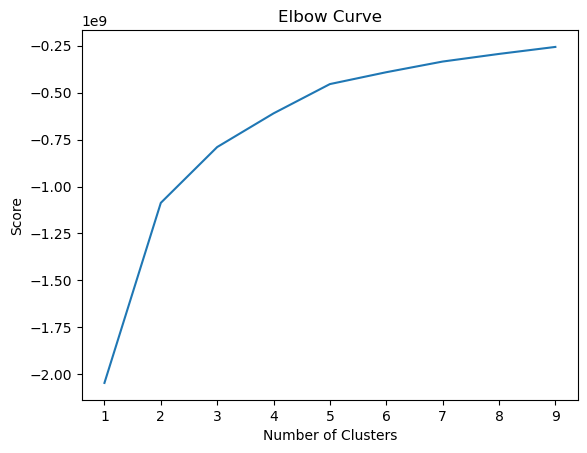

In [51]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Here is a good jump from 2 to 3 on the X-Axis, afterwards the curve straightens out. It means that the optimal count for clusters is 3.

### 4. K-MEANS CLUSTERING 

In [52]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [53]:
# Fit the k-means object to the data.

kmeans.fit(asia)

C:\Users\gryzu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [54]:
asia['clusters'] = kmeans.fit_predict(asia)

C:\Users\gryzu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
asia.head()

,Item Profit Ratio,Item Quantity,Sales,Items Total,Profit Per Order,Product Price,clusters
0,0.29,1,327.75,314.640015,91.250000,327.75,1
1,-0.80,1,327.75,311.359985,-249.089996,327.75,1
2,-0.80,1,327.75,309.720001,-247.779999,327.75,1
3,0.33,1,327.75,288.420013,95.180000,327.75,1
4,0.24,1,327.75,285.140015,68.430000,327.75,1


In [61]:
asia['clusters'].value_counts()

clusters
0    23768
1     7263
2       81
Name: count, dtype: int64

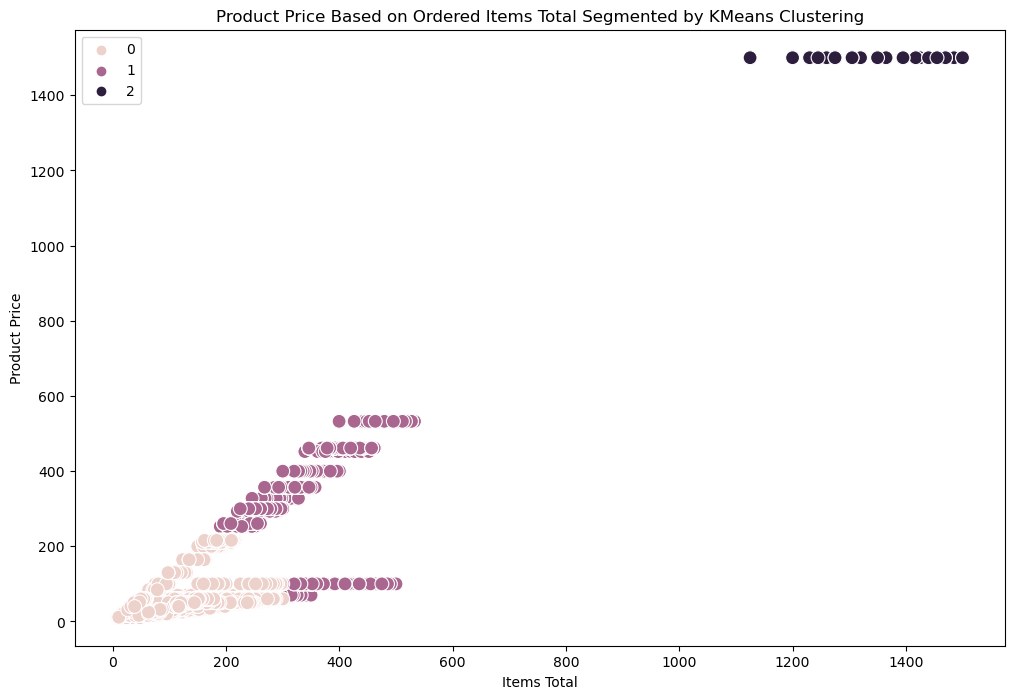

In [77]:
# Plot the clusters for the "Product Price" and "Items Total" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=asia['Items Total'], y=asia['Product Price'], hue=kmeans.labels_, s=100) 

plt.title('Product Price Based on Ordered Items Total Segmented by KMeans Clustering')

ax.grid(False)
plt.xlabel('Items Total') 
plt.ylabel('Product Price')
plt.show()

Cluster 0 represents relative lower prices than cluster 1. However, both of them have very close distances between the dots. Cluster 3 indicates very high prices compared to clusters 0 and 1, but also has short-distanced dots. From the scatterplot we can understand: 

Cluster 0:
Both the mean and median items total are relatively low compared to other clusters, indicating smaller order sizes.
Customers in this cluster tend to purchase fewer items per order, impacting the total value of orders.

Cluster 1:
Similar to Cluster 0, the items total is lower compared to Cluster 2, indicating smaller order sizes.
However, despite smaller order sizes, the higher profit margins contribute to overall profitability.

Cluster 2:
This cluster has the lowest items total among all clusters, indicating the smallest order sizes.
Despite smaller order sizes, the high profit margins result in significant profitability.

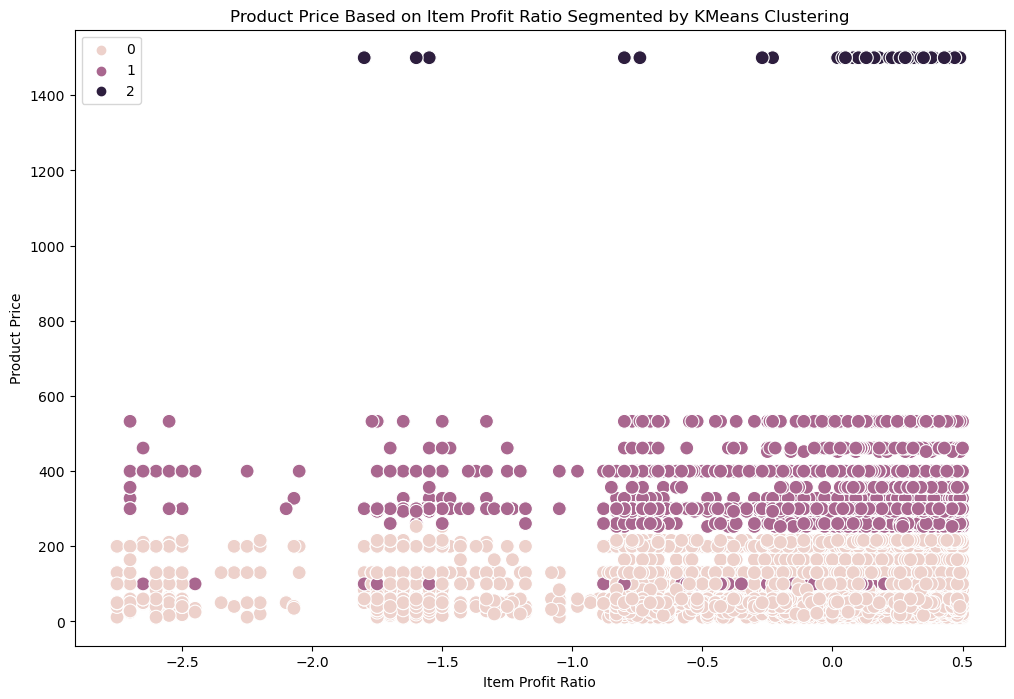

In [78]:
# Plot the clusters for the "Product Price" and "Item Profit Ratio" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=asia['Item Profit Ratio'], y=asia['Product Price'], hue=kmeans.labels_, s=100) 

plt.title('Product Price Based on Item Profit Ratio Segmented by KMeans Clustering')

ax.grid(False)
plt.xlabel('Item Profit Ratio') 
plt.ylabel('Product Price')
plt.show()

Here we may see a more intensive correlation between dots (distance) after Item Profit ratio = 0.0. It means that most of products sold under the prices below 400 have good item/profit ratio.

Cluster 0: The mean and median item profit ratio in this cluster are relatively low compared to other clusters, indicating lower profit margins. This suggests that products in this cluster may not be as lucrative as those in other clusters.

Cluster 1: The item profit ratio is slightly higher than Cluster 0, indicating better profit margins. Although not as high as Cluster 2, products in this cluster still yield decent profits.

Cluster 2: This cluster has the highest item profit ratio among all clusters, indicating the highest profit margins. Products in this cluster are likely premium or high-value items, contributing significantly to overall prоfitability.

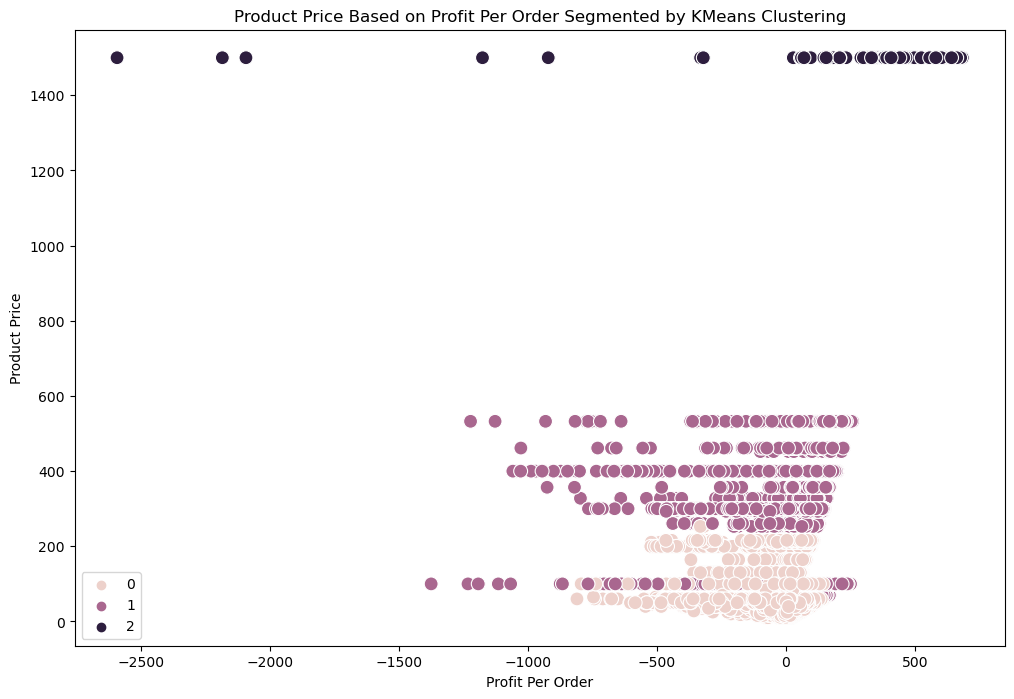

In [79]:
# Plot the clusters for the "Product Price" and "Profit Per Order" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=asia['Profit Per Order'], y=asia['Product Price'], hue=kmeans.labels_, s=100) 

plt.title('Product Price Based on Profit Per Order Segmented by KMeans Clustering')

ax.grid(False)
plt.xlabel('Profit Per Order') 
plt.ylabel('Product Price')
plt.show()

We can see the most intensive distance between dotsf or positive profits (above 0), meaning that there are more products sold with positive profit, than with negative profit. 

Cluster 0:
The mean and median profit per order are lower compared to other clusters, indicating lower profitability per order.
Despite moderate sales volume, the lower profit margins result in lower profits per order.

Cluster 1:
The profit per order is higher than Cluster 0, indicating better profitability per order.
Despite smaller order sizes, the higher profit margins contribute to higher profits per order.

Cluster 2:
This cluster has the highest profit per order among all clusters, indicating the highest profitability per order.
Despite the smallest order sizes, the highest profit margins result in the highest profits per order.

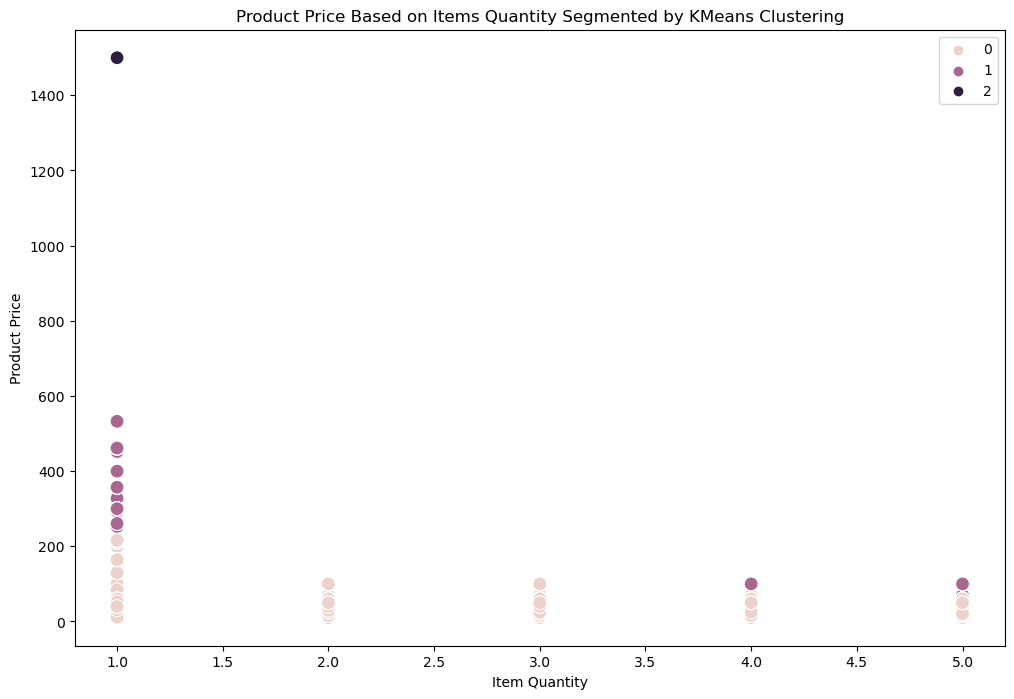

In [80]:
# Plot the clusters for the "Product Price" and "Item Quantity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=asia['Item Quantity'], y=asia['Product Price'], hue=kmeans.labels_, s=100) 

plt.title('Product Price Based on Items Quantity Segmented by KMeans Clustering')

ax.grid(False)
plt.xlabel('Item Quantity') 
plt.ylabel('Product Price')
plt.show()

The most intensive distance between dots we may observe for the clusters 1 and 2, where the Item Quantity equals to 1. 

Cluster 0:
The mean and median item quantity are around 2, suggesting that customers in this cluster purchase a moderate number of items per order.
However, compared to other clusters, the quantity sold per order in this cluster is relatively lower.

Cluster 1:
The item quantity is lower than Cluster 0, indicating that customers in this cluster purchase fewer items per order.
Despite lower quantity, the profit margins are higher, suggesting a focus on higher-priced or premium items.

Cluster 2:
This cluster has the lowest item quantity among all clusters, indicating that customers in this cluster purchase the fewest items per order.
However, due to the high profit margins, even a small number of items sold per order can contribute significantly to overall profitability.

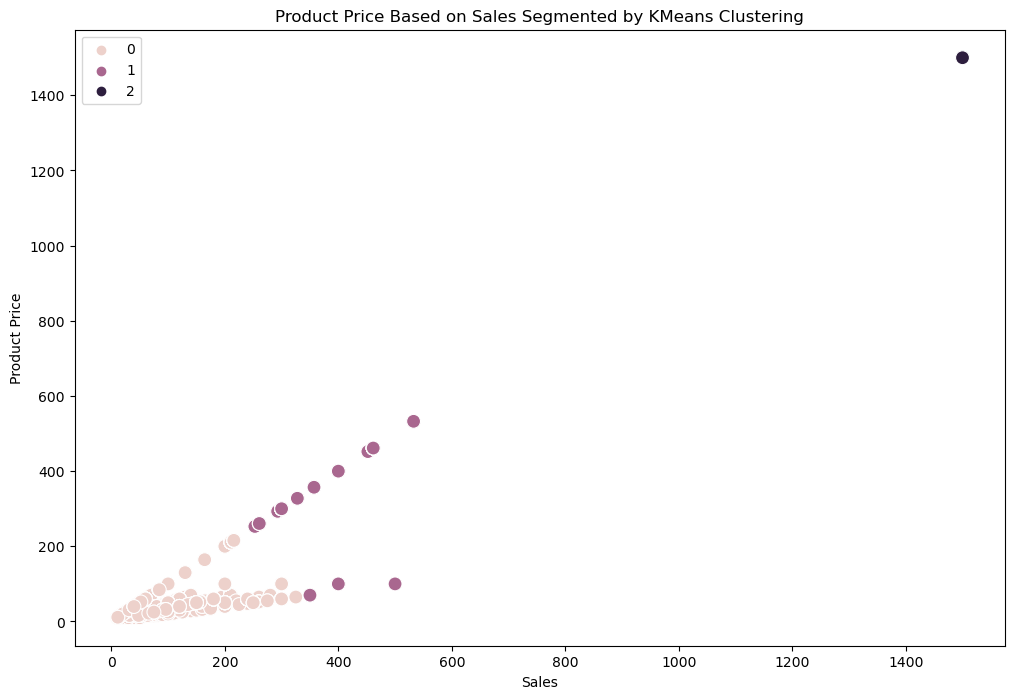

In [85]:
# Plot the clusters for the "Product Price" and "Sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=asia['Sales'], y=asia['Product Price'], hue=kmeans.labels_, s=100) 

plt.title('Product Price Based on Sales Segmented by KMeans Clustering')

ax.grid(False)
plt.xlabel('Sales') 
plt.ylabel('Product Price')
plt.show()

Here we may observe very good distances for Cluster 0, especially before the Sales equal to 400.

Cluster 0:
The mean and median sales are moderate, indicating average sales volume.
Despite lower profit margins and smaller order sizes, the moderate sales volume contributes to overall revenue.

Cluster 1:
The sales are higher than Cluster 0, indicating higher sales volume.
Despite smaller order sizes, the higher profit margins contribute to higher revenue.

Cluster 2:
This cluster has the highest sales among all clusters, indicating the highest sales volume.
Despite the smallest order sizes, the highest profit margins result in the highe revenue. 



In [90]:
asia.groupby('clusters').agg({'Item Profit Ratio':['mean', 'median'], 
                         'Item Quantity':['mean', 'median'], 
                         'Items Total':['mean', 'median'],
                           'Profit Per Order':['mean', 'median'],
                              'Sales':['mean', 'median'],
                          'Product Price':['mean', 'median']})

Item Profit Ratio        Item Quantity         Items Total  \
                      mean median          mean median         mean   
clusters                                                              
0                 0.115212   0.27      2.244530    2.0   130.704892   
1                 0.120329   0.27      1.352196    1.0   331.644602   
2                 0.187284   0.29      1.000000    1.0  1344.907407   

                      Profit Per Order                    Sales               \
               median             mean      median         mean       median   
clusters                                                                       
0          124.285000        14.747014   22.490000   145.481088   129.990005   
1          327.980011        39.335333   82.500000   368.689940   399.980011   
2         1350.000000       247.850370  382.730011  1500.000000  1500.000000   

         Product Price               
                  mean       median  
clusters                             
0            82.744525    59.990002  
1           333.721604   327.750000  
2          1500.000000  1500.000000

### 5. FINAL DISCUSSION

These results from the cluster analysis can be immensely useful for various future steps in an analytics pipeline:

Predictive Modeling: the cluster labels can serve as a target variable in predictive modeling tasks. For example, they can be used to predict customer behavior, such as future purchases, based on their characteristics and cluster membership.

Customer Segmentation: the clusters identified can be utilized to segment the customer base for targeted marketing campaigns, personalized product recommendations, and tailored communication strategies to enhance customer engagement and satisfaction.

Price Optimization: understanding how different customer segments respond to pricing can inform pricing strategies. By analyzing the relationship between product price and cluster membership, businesses can optimize pricing to maximize revenue and profitability while maintaining customer satisfaction.

Supply Chain and Inventory Management: clustering can assist in inventory management by identifying which products are popular among different customer segments. This information can be used to optimize inventory levels, anticipate demand fluctuations, and minimize stockouts or overstock situations.